In [14]:
import numpy as np
# dataset
data = np.genfromtxt('advertising.csv ', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [30]:
import numpy as np

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Initialize thetas randomly or use pre-defined thetas for testing
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])  # Test values
    
    thetas_path = [thetas.copy()]
    losses = []
    N = X_b.shape[0]  # Number of samples

    for epoch in range(n_epochs):
        for i in range(N):
            # Select a random index in N for stochastic behavior
            random_index = i  # Pick a random index
            
            # Select the corresponding row (xi) and label (yi)
            xi = X_b [ random_index : random_index +1]
            yi = y [ random_index : random_index +1]

            # Compute prediction
            y_pred = xi.dot(thetas)

            # Compute loss
            li = ((y_pred - yi) ** 2)/2

            # Compute gradient
            gradient = xi.T.dot(y_pred - yi)

            # Update thetas
            thetas = thetas - learning_rate * gradient

            # Logging the updated thetas and loss
            thetas_path.append(thetas.copy())
            losses.append(li)

    return thetas_path, losses


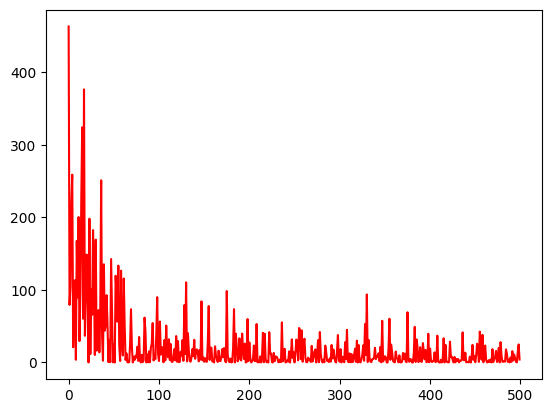

In [11]:
import matplotlib.pyplot as plt

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [31]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate=0.01 )
print (np.sum(losses))

6754.643359356192
